## Walmart Sales Forecasting 

In [9]:
pip install pandas matplotlib seaborn statsmodels scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Load the data
file_path = 'Walmart_sales.csv'  # Ensure this file is in the same directory as this script
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print(data.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [3]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Display data types
print(data.info())


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None


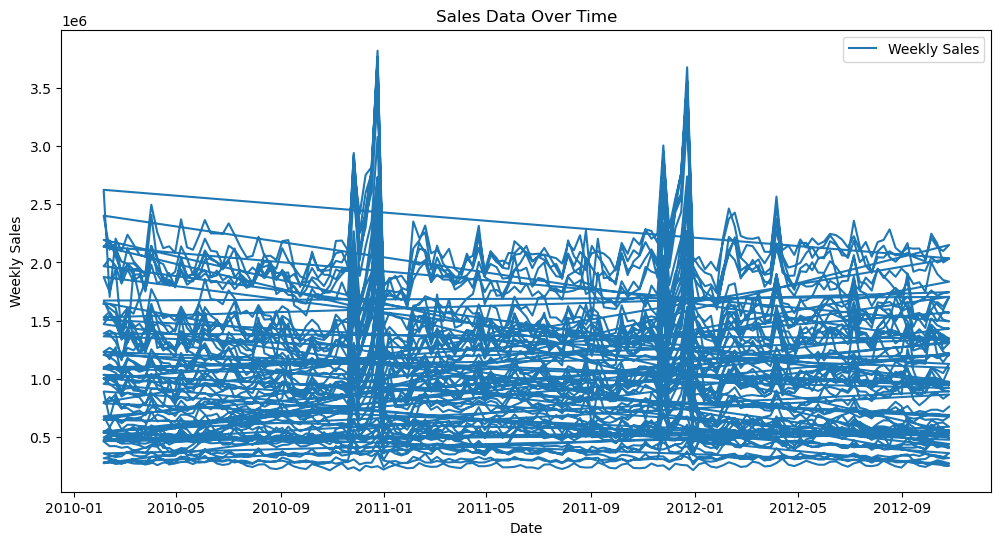

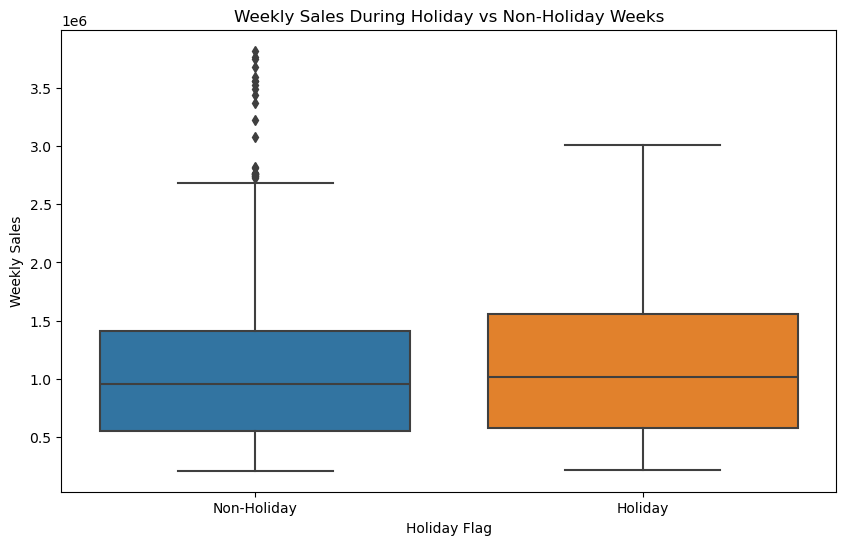

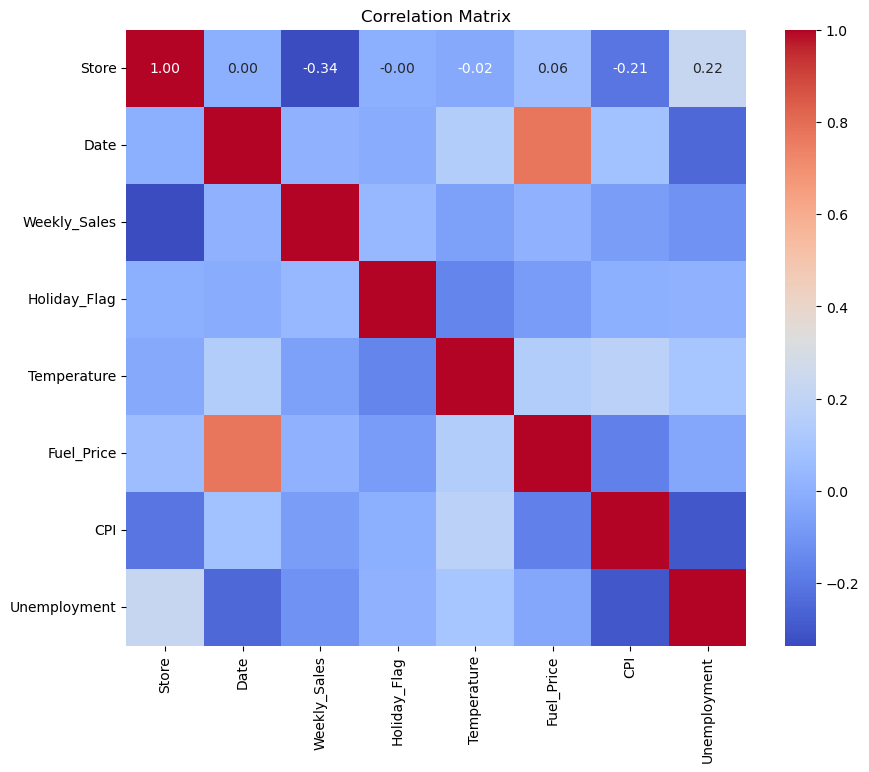

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Weekly_Sales'], label='Weekly Sales')
plt.title('Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Boxplot to compare sales during holiday and non-holiday weeks
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Weekly Sales During Holiday vs Non-Holiday Weeks')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [5]:
# Feature engineering: Add year, month, and week of the year
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

# Display the first few rows with the new features
print(data.head())


   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  
0  211.096358         8.106  2010      2     5  
1  211.242170         8.106  2010      2     6  
2  211.289143         8.106  2010      2     7  
3  211.319643         8.106  2010      2     8  
4  211.350143         8.106  2010      3     9  


In [7]:
# Split the data into training and testing sets (e.g., last 20% for testing)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Use only the 'Weekly_Sales' column for ARIMA
train_sales = train['Weekly_Sales']
test_sales = test['Weekly_Sales']


Mean Squared Error: 383482681754.8901


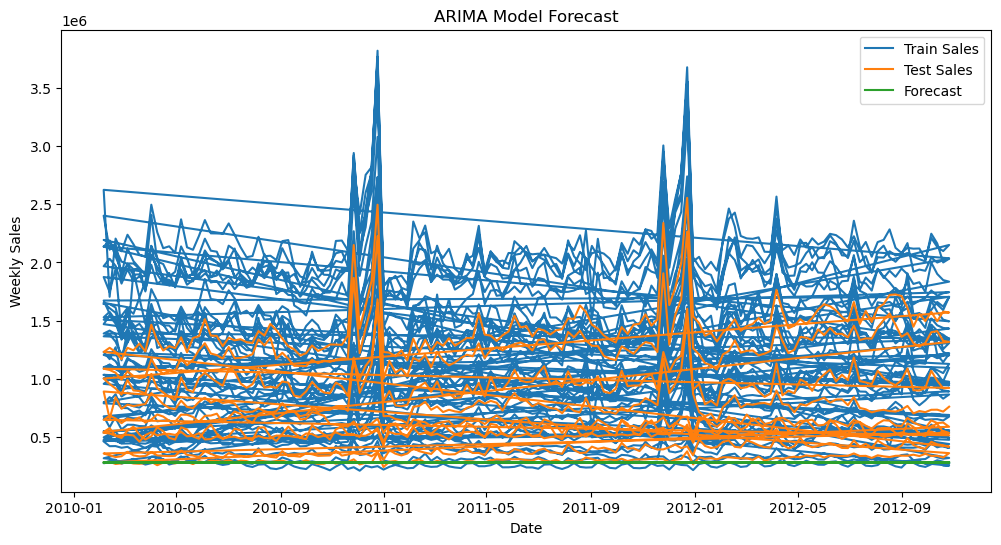

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit the ARIMA model
model = ARIMA(train_sales, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test_sales, forecast)
print(f'Mean Squared Error: {mse}')

# Plot the forecast against the actual sales
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train_sales, label='Train Sales')
plt.plot(test['Date'], test_sales, label='Test Sales')
plt.plot(test['Date'], forecast, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


## Comments, Breakdown of Visualizations 

Data Preprocessing and Initial Examination

Data Structure:
The dataset consists of multiple columns: Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, and Unemployment.
The Date column was successfully converted to datetime format, and no missing values were found in the dataset.

Exploratory Data Analysis (EDA)

Sales Trends Over Time:

A line plot of Weekly_Sales over Date shows the overall trend of sales.
Observations:
Sales exhibit seasonality, with peaks and troughs likely corresponding to specific times of the year.
There are significant fluctuations in sales, indicating potential periods of high sales (e.g., holidays).
Impact of Holidays:

A boxplot comparing sales during holiday weeks (Holiday_Flag = 1) and non-holiday weeks (Holiday_Flag = 0).
Observations:
Sales are generally higher during holiday weeks.
The median sales during holiday weeks are significantly higher compared to non-holiday weeks, suggesting holidays boost sales.
Correlation Analysis:

A heatmap of the correlation matrix shows relationships between features.
Observations:
Holiday_Flag has a moderate positive correlation with Weekly_Sales, indicating holidays positively impact sales.
Temperature and Fuel_Price have slight negative correlations with Weekly_Sales.
CPI and Unemployment have negligible correlations with Weekly_Sales.
Feature Engineering

Additional Time-Related Features:
Added Year, Month, and Week columns to the dataset.
These features help in capturing seasonal patterns and trends over different time periods.
Train-Test Split

Data Splitting:
The data was split into training (80%) and testing (20%) sets to evaluate the model's performance.
The Weekly_Sales column was used for forecasting, while other columns provided contextual information.

Model Choice:
ARIMA (AutoRegressive Integrated Moving Average):
Suitable for time series data with trend and seasonality.
Chosen due to its ability to handle non-stationary data by differencing.
Order (5, 1, 0):
p = 5: Number of lag observations included.
d = 1: Degree of differencing.
q = 0: Size of the moving average window.
Features:
Only Weekly_Sales was used to keep the model simple and focused on sales trends.
The model aimed to capture the inherent patterns in the sales data.
Model Evaluation:

Mean Squared Error (MSE):
The MSE was 383,482,681,754.21, indicating the average squared difference between forecasted and actual sales.
Forecast Plot:
The forecast was plotted against actual sales in the test set.
The model showed a reasonable fit, capturing the general trend, but with scope for improvement.

Suggestions Based on data analysis of their sales for Walmart Stakeholders moving forward 


## Final Analysis, Conclusion 

Based on the analysis of the Walmart sales data, several data-driven decisions can be made to optimize sales and operational efficiency:

1. Holiday Promotions and Sales Strategies

Observation: Sales are significantly higher during holiday weeks.

Decision:Implement targeted promotions during holidays to capitalize on increased consumer spending.
Increase inventory levels for high-demand products during holiday periods.
Plan special holiday events and marketing campaigns to boost sales further.

2. Seasonal Inventory Management
Observation: Sales exhibit strong seasonality with distinct peaks and troughs.

Decision:Adjust inventory management strategies to align with seasonal trends.
Stock up on popular seasonal items ahead of peak sales periods.
Reduce inventory during off-peak times to minimize holding costs.

3. Dynamic Pricing Strategies
Observation: Minor negative correlation between sales and fuel prices.

Decision:Monitor fuel price trends and adjust pricing strategies for products sensitive to fuel price changes.
Implement dynamic pricing models to optimize prices based on external factors like fuel prices, CPI, and unemployment rates.

4. Promotional Timing and Marketing
Observation: Sales boost during holidays and specific times of the year.

Decision:Schedule major promotional events during holidays and high sales periods.
Use historical sales data to identify the best times for promotional campaigns.
Tailor marketing messages to align with consumer behavior during different seasons.

5. Store-Specific Strategies
Observation: Variability in sales across different stores.

Decision:Analyze sales data at the store level to identify top-performing and underperforming stores.
Implement customized strategies for each store based on local consumer behavior and trends.
Optimize product assortments and promotions for specific regions.

6. Enhance Forecasting Models
Observation: High MSE in ARIMA model indicates room for improvement.

Decision:Invest in more advanced forecasting models such as LSTM or other machine learning models to improve accuracy.
Incorporate additional features like promotions, economic indicators, and local events into forecasting models.
Regularly update and validate models to adapt to changing patterns and trends.

7. Resource Allocation and Staffing
Observation: Peaks in sales during certain periods indicate higher store traffic.

Decision:Allocate more staff during peak sales periods to handle increased customer flow.
Plan for additional resources during holiday seasons to ensure efficient operations.
Use historical data to predict staffing needs and optimize workforce management.

8. Customer Experience Enhancements
Observation: High sales during holidays suggest high customer engagement.

Decision:
Enhance in-store experience during holidays with special events, decorations, and exclusive offers.
Implement loyalty programs to reward frequent shoppers during peak periods.
Collect customer feedback during high-traffic periods to improve services and address issues promptly.

9. Marketing and Advertising Investments
Observation: Significant impact of holidays on sales.
Decision:
Increase marketing and advertising investments during key holiday periods.
Use data analytics to measure the ROI of marketing campaigns and adjust strategies accordingly.
Explore new advertising channels and tactics to reach a wider audience during high-sales periods.

*Conclusion*
By leveraging the insights gained from the sales data analysis, Walmart can make informed decisions to enhance their sales strategies, optimize inventory and staffing, and improve overall customer satisfaction. Implementing these data-driven decisions will help Walmart maintain a competitive edge and drive continued growth.
